In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from xgboost import plot_importance, XGBClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from time import time
import seaborn as sns

from tensorflow.keras.layers import (Dense, Activation, Input, Conv2D, MaxPooling2D, Flatten,
                                     GlobalMaxPooling2D, LeakyReLU, concatenate, Dropout)
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [2]:
X = np.load('../project1/X.npy')
Y = np.load('../project1/Y.npy')

In [3]:
Ydf = DataFrame(data=Y, columns=[9-x for x in range(10)])
Ydf = Ydf[[x for x in range(10)]].to_numpy()
#Ydf = Y
#Ydf['class']='C' + (Ydf[range(10)].idxmax(axis=1)).astype('str')
#Ydf[['class']]
#Y2 = Ydf[['class']].to_numpy()

In [4]:
Ydf

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [5]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [6]:
X.shape

(2062, 64, 64, 1)

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Ydf, test_size=0.3, random_state=42)

In [8]:
def create_model(input_shape=(64,64,1)):
    return Sequential([
        Input(shape=input_shape),
        
        Conv2D(8,(3,3), padding='same', input_shape=input_shape),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(16,(3,3), padding='same'),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        
        Conv2D(4,(3,3), padding='same'),
        Activation('relu'),
        MaxPooling2D(pool_size=(2,2)),
        
        Flatten(),
        
        Dense(64),
        Activation('relu'),
        Dense(32),
        Activation('relu'),
        Dense(10),
        Activation('softmax')
])

In [9]:
loss='categorical_crossentropy'
LEARNING_RATE = 0.05
BATCH_SIZE = X_train.shape[0]//20 # computing the loss over the whole dataset
EPOCHS = 300
model = create_model()
model.compile(loss=loss, optimizer='adamax')# metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         80        
_________________________________________________________________
activation (Activation)      (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 4)         5

In [10]:
t0 = time()
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)
print (time()-t0)

Train on 1443 samples, validate on 619 samples
Epoch 1/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 2.3020 - val_loss: 2.2982
Epoch 2/300
1443/1443 [==============================] - 1s 935us/sample - loss: 2.2938 - val_loss: 2.2927
Epoch 3/300
1443/1443 [==============================] - 1s 965us/sample - loss: 2.2851 - val_loss: 2.2846
Epoch 4/300
1443/1443 [==============================] - 1s 969us/sample - loss: 2.2735 - val_loss: 2.2718
Epoch 5/300
1443/1443 [==============================] - 1s 958us/sample - loss: 2.2549 - val_loss: 2.2524
Epoch 6/300
1443/1443 [==============================] - 1s 958us/sample - loss: 2.2261 - val_loss: 2.2105
Epoch 7/300
1443/1443 [==============================] - 1s 877us/sample - loss: 2.1694 - val_loss: 2.1400
Epoch 8/300
1443/1443 [==============================] - 1s 841us/sample - loss: 2.0885 - val_loss: 2.0427
Epoch 9/300
1443/1443 [==============================] - 1s 832us/sample - loss: 1.9922 - val_loss:

1443/1443 [==============================] - 2s 1ms/sample - loss: 0.4136 - val_loss: 0.4755
Epoch 78/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.4037 - val_loss: 0.4703
Epoch 79/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.4139 - val_loss: 0.4700
Epoch 80/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.4000 - val_loss: 0.4573
Epoch 81/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.3882 - val_loss: 0.4592
Epoch 82/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.3800 - val_loss: 0.4549
Epoch 83/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.3822 - val_loss: 0.4518
Epoch 84/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.3820 - val_loss: 0.4493
Epoch 85/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.3776 - val_loss: 0.4493
Epoch 86/300
1443/1443 [==============================] - 2

Epoch 154/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.2150 - val_loss: 0.3699
Epoch 155/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.2194 - val_loss: 0.3677
Epoch 156/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.2301 - val_loss: 0.3810
Epoch 157/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.2116 - val_loss: 0.3625
Epoch 158/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.2067 - val_loss: 0.3614
Epoch 159/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.2046 - val_loss: 0.3546
Epoch 160/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.2038 - val_loss: 0.3555
Epoch 161/300
1443/1443 [==============================] - 2s 2ms/sample - loss: 0.2045 - val_loss: 0.3610
Epoch 162/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.2151 - val_loss: 0.3735
Epoch 163/300
1443/1443 [============

1443/1443 [==============================] - 2s 2ms/sample - loss: 0.1066 - val_loss: 0.3364
Epoch 231/300
1443/1443 [==============================] - 2s 2ms/sample - loss: 0.1052 - val_loss: 0.3295
Epoch 232/300
1443/1443 [==============================] - 2s 2ms/sample - loss: 0.1084 - val_loss: 0.3371
Epoch 233/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.1131 - val_loss: 0.3340
Epoch 234/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.1072 - val_loss: 0.3259
Epoch 235/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.1046 - val_loss: 0.3303
Epoch 236/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.1011 - val_loss: 0.3288
Epoch 237/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.1001 - val_loss: 0.3292
Epoch 238/300
1443/1443 [==============================] - 2s 1ms/sample - loss: 0.0990 - val_loss: 0.3381
Epoch 239/300
1443/1443 [==========================

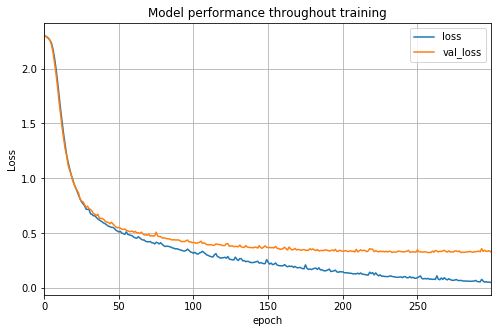

In [11]:
DataFrame(history.history).plot(figsize=(8, 5))#, logy=True)
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [12]:
y_pred = model.predict(X_valid)

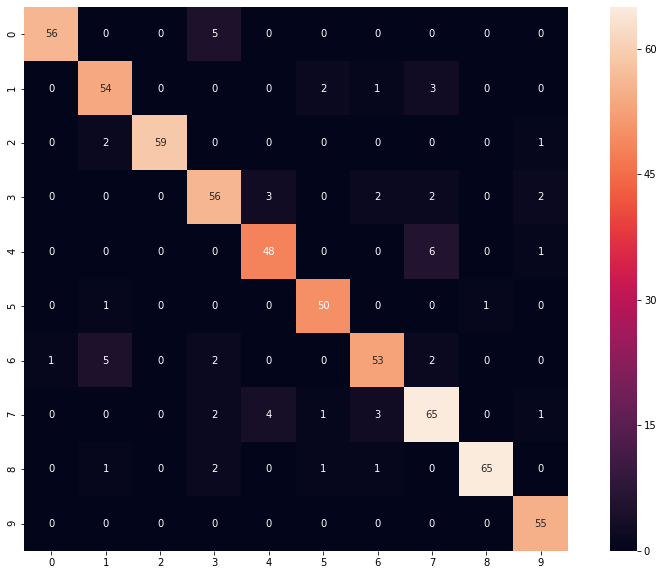

Accuracy= 0.9063004846526656


In [13]:
y_valid_class = y_valid.argmax(axis=1)
y_pred_class = y_pred.argmax(axis=1)
conf_mat = confusion_matrix(y_valid_class, y_pred_class)
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f')
plt.show()
print('Accuracy=', accuracy_score(y_valid_class, y_pred_class))

In [14]:
y_pred[0]

array([2.4798669e-13, 4.6865307e-06, 1.5745710e-10, 9.9201435e-01,
       8.0304382e-08, 2.1731482e-12, 7.4052121e-03, 5.7539594e-04,
       2.7438796e-07, 6.0412336e-10], dtype=float32)